# Toxic Comment Classification

In [ ]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objs as plotly
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, LSTM, Embedding
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D, Dense, Input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Lambda
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk import bigrams
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from sklearn.metrics import confusion_matrix, classification_report
import re
import plotly.graph_objs as go

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Note: This is the link for the dataset that we used for this project.

https://www.kaggle.com/competitions/jigsaw-multilingual-toxic-comment-classification/data?select=jigsaw-toxic-comment-train.csv


### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import data from the drive folder
data = pd.read_csv('/content/drive/My Drive/Toxic Comments Classifier/jigsaw-toxic-comment-train.csv')

In [ ]:
#display contents of the training data
display(data)
#length of the data set
print(len(data))

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


223549


# Data Preprocessing

In [ ]:
def clean_data(text):
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = text.lower()
  return text

data['comment_text'] = data['comment_text'].apply(clean_data)
display(data)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,jerome i see you never got around to this im n...,0,0,0,0,0,0
223545,fff9d70fe0722906,lucky bastard httpwikimediafoundationorgwikipr...,0,0,0,0,0,0
223546,fffa8a11c4378854,shame on you all you want to speak about gays ...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,mel gibson is a nazi bitch who makes shitty mo...,1,0,1,0,1,0


###Splitting the data

In [ ]:
# funciton for splitting the data randomly.
'''
training - 60
validation - 30
test - 10 (used only once)
'''
# Create a binary label for whether any toxicity flags are true
data['any_category'] = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis=1).astype(int)

train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size = 0.25, random_state =42)
#display sizes of two dataset
print("Training set size: ", len(train_data)) #60% of the dataset
print("Validation set size: ", len(val_data)) #30% of the dataset
print("Test set size: ", len(test_data)) #10% of the dataset

Training set size:  134129
Validation set size:  67065
Test set size:  22355


## Understanding the Data

### Data Analysis

The data contains comments that are categorized into several categories. Not all the comments fall under the toxic comments categories. We have plotted some graphs to understand how many comments do not fall under each categories and some fall under one or more categories.

1. **Number of Comments by Category** : This graph shows the comments which fall under different categories.

2. **Comments classified as toxic and non-toxic** : The graph shows the number of occurences under toxic comments and under non-toxic comments.

3. **Words frequenctly occuring in each categories** - This graph shows  words that occur frequently in each of these categories (under "toxic", "severe toxic", "obscene", "threat", "insult", "identity hate"). These words frquently appear under negative comments so they will highly influence our model's prediction if the comment is toxic or not.
4. **Words frequently occurring in non-toxic category** : Some of the words that may frequently be used may influence the model's prediction for non-toxic categories.

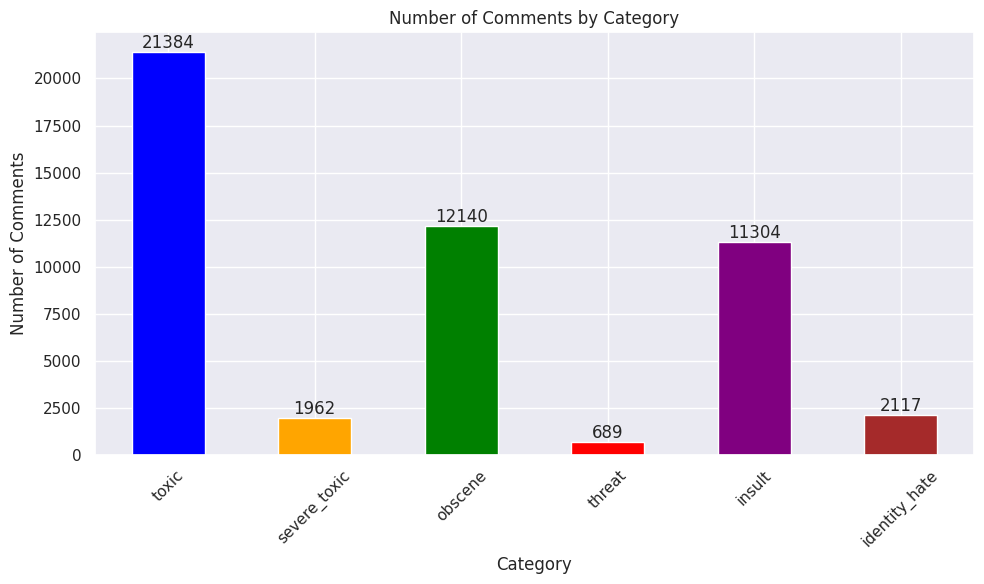

In [ ]:
#plot graph bar to show the number of each kinds of toxic comments

# Calculate the total number of comments for each category
category_counts = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = category_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.title('Number of Comments by Category')

# Adding counts above each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Showing the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

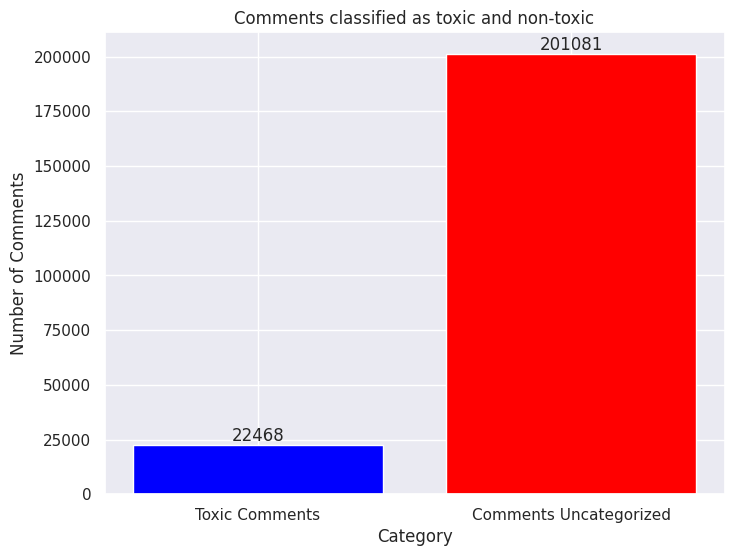

In [ ]:
#graph to compare comments that are either problematic (classify as toxic, obscene, etc) or not
data['any_category'] = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis=1)

# Count the number of comments falling under any category and those that don't
comments_with_category = data['any_category'].sum()
comments_without_category = len(data) - comments_with_category

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Toxic Comments', 'Comments Uncategorized'], [comments_with_category, comments_without_category], color=['blue', 'red'])

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.title('Comments classified as toxic and non-toxic')

# Adding counts above each bar
for i, value in enumerate([comments_with_category, comments_without_category]):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Showing the plot
plt.show()


In [ ]:
def clean_tokenize_comments(comments):
    stopwords_set = set(stopwords.words('english'))
    words_list = []

    for comment in comments:
        text = ''.join([char for char in comment.lower() if char not in string.punctuation])
        tokens = word_tokenize(text)
        filtered_words = [word for word in tokens if word not in stopwords_set]
        words_list.extend(filtered_words)

    return words_list

toxic_comments = data[data['any_category'] == True]['comment_text']
non_toxic_comments = data[data['any_category'] == False]['comment_text']
toxic_words = clean_tokenize_comments(toxic_comments)
non_toxic_words = clean_tokenize_comments(non_toxic_comments)


def plot_top_words(words, title, N=10):
    # Count words and select top N
    word_counts = Counter(words)
    top_words = word_counts.most_common(N)

    # Separate into labels and values
    labels, values = zip(*top_words)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()

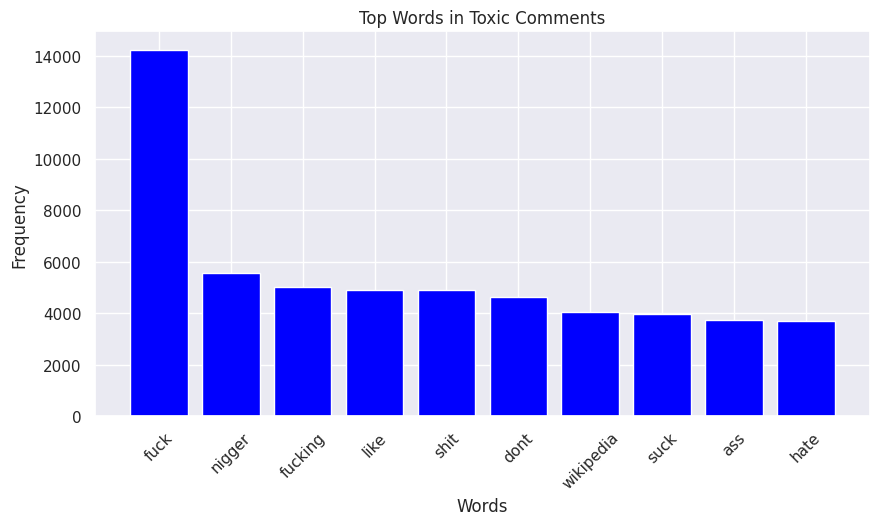

In [ ]:
# Plotting the most common toxic comments
plot_top_words(toxic_words, 'Top Words in Toxic Comments')

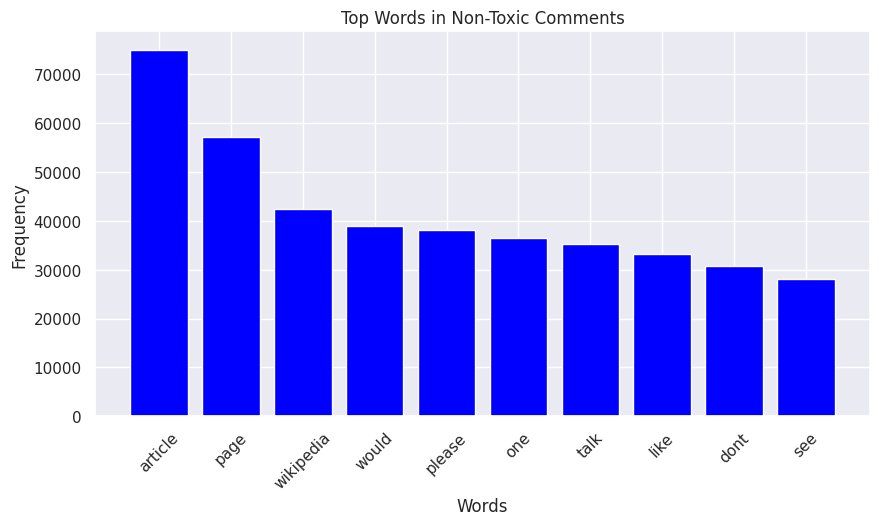

In [ ]:
#Plotting the most common non-toxic comments
plot_top_words(non_toxic_words, 'Top Words in Non-Toxic Comments')

## Baseline

In [ ]:
#By observing the graph above, there are approximately 11% comments are classified as toxic
#Baseline could be all comments are not toxic
total_comments = len(data)
comments_with_category = data['any_category'].sum()  # Toxic comments
comments_without_category = total_comments - comments_with_category  # Non-toxic comments

percentage_uncategorized = (comments_without_category / len(data)) * 100
percentage_toxic = (comments_with_category / total_comments) * 100
percentage_non_toxic = (comments_without_category / total_comments) * 100

print(f"Baseline: Assuming all comments are non-toxic gives an accuracy of {percentage_non_toxic:.2f}%.")

Baseline: Assuming all comments are non-toxic gives an accuracy of 89.95%.


## Creating Models

### Model 1: Binary Classification with Downsampling

### Visualizing training and validation metrics

In [ ]:
def plot_training_history(history):
    """Plot the training and validation accuracy and loss.

    Args:
    history: A Keras History object.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/3
842/842 [==============================] - 89s 101ms/step - loss: 0.5893 - accuracy: 0.7024 - val_loss: 0.4454 - val_accuracy: 0.8027
Epoch 2/3
842/842 [==============================] - 31s 37ms/step - loss: 0.3967 - accuracy: 0.8463 - val_loss: 0.3827 - val_accuracy: 0.8484
Epoch 3/3
842/842 [==============================] - 19s 22ms/step - loss: 0.3212 - accuracy: 0.8774 - val_loss: 0.4141 - val_accuracy: 0.8035


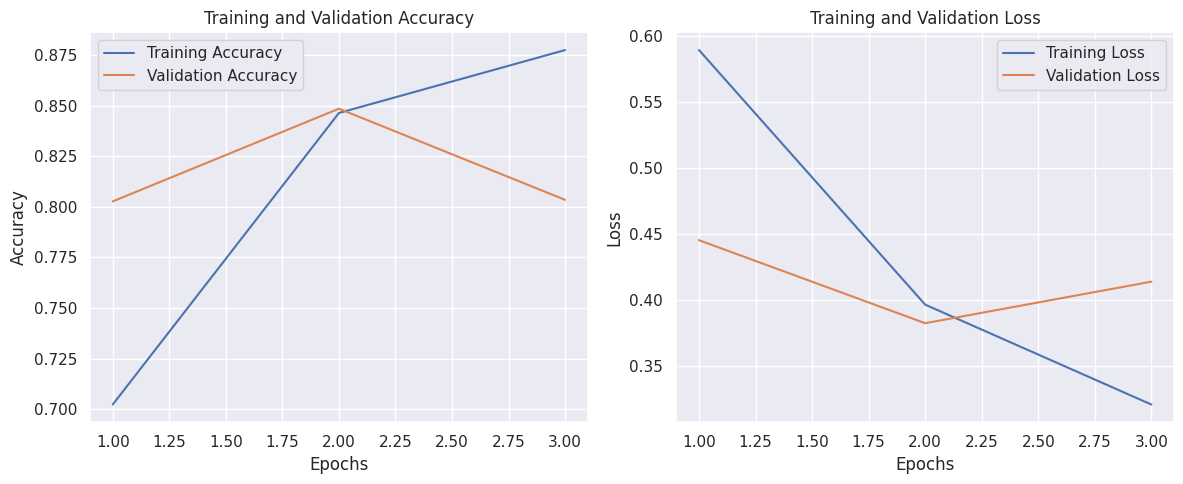

In [ ]:
# Apply downsampling for balance on the training set only
categorized_comments = train_data[train_data['any_category'] == 1]
uncategorized_comments = train_data[train_data['any_category'] == 0].sample(n=len(categorized_comments), random_state=42)

# Combine and shuffle to create a balanced training set
balanced_train_data = pd.concat([categorized_comments, uncategorized_comments]).sample(frac=1, random_state=42)

# Split the balanced training data into features and labels
X_train = balanced_train_data['comment_text']
y_train = balanced_train_data['any_category']

# Prepare validation and test sets
X_val = val_data['comment_text']
y_val = val_data['any_category']
X_test = test_data['comment_text']
y_test = test_data['any_category']

# Define the parameters for vectorization and embedding
max_features = 10000
max_len = 500
embedding_dim = 50

# Initialize and adapt the TextVectorization layer to the training data
vectorize_layer_1 = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len
)
vectorize_layer_1.adapt(X_train)

# Build the model
model_1 = Sequential([
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer_1,
    Embedding(input_dim=max_features+1, output_dim=embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_1.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), batch_size=32)

plot_training_history(history)

### Model 2: Binary Classification without Downsampling

Epoch 1/3
4192/4192 [==============================] - 114s 27ms/step - loss: 0.2585 - accuracy: 0.9097 - val_loss: 0.1958 - val_accuracy: 0.9254
Epoch 2/3
4192/4192 [==============================] - 51s 12ms/step - loss: 0.1692 - accuracy: 0.9369 - val_loss: 0.1703 - val_accuracy: 0.9449
Epoch 3/3
4192/4192 [==============================] - 41s 10ms/step - loss: 0.1398 - accuracy: 0.9486 - val_loss: 0.1459 - val_accuracy: 0.9481


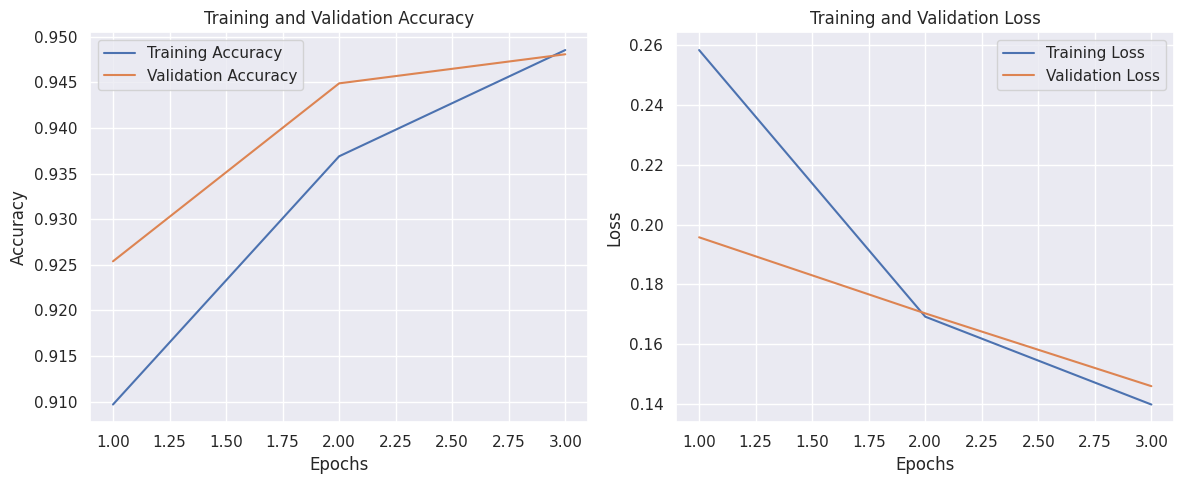

In [ ]:
#Without downsampling
# Split the data into features and labels for each set
X_train = train_data['comment_text']
y_train = train_data['any_category']
X_val = val_data['comment_text']
y_val = val_data['any_category']
X_test = test_data['comment_text']
y_test = test_data['any_category']

# Define the parameters for vectorization and embedding
max_features = 10000
max_len = 500
embedding_dim = 50

# Initialize and adapt the TextVectorization layer to the training data
vectorize_layer_2 = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len
)
vectorize_layer_2.adapt(X_train)

# Build the model
model_2 = Sequential([
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer_2,
    Embedding(input_dim=max_features+1, output_dim=embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_2.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), batch_size=32)

#Plotting graph to understand the validation and accuracy
plot_training_history(history)

### Experiements with embeddings

In [ ]:
#Training the model with different embedding dimensions
#Different embedding sizes to test
embedding_dims = [20, 50, 100, 200]
results= []

for dim in embedding_dims:
    model = Sequential([
        Input(shape=(1,), dtype=tf.string),
        vectorize_layer_1,  # Assuming this has already been adapted to the training data
        Embedding(input_dim=max_features+1, output_dim=dim),
        GlobalAveragePooling1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f"Training model with embedding dimension: {dim}")
    history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), batch_size=32)

    # Store or print results
    results.append({
        'embedding_dim': dim,
        'train_accuracy': history.history['accuracy'][-1],
        'validation_accuracy': history.history['val_accuracy'][-1]
    })

# Display results
for result in results:
    print(f"Embedding Dimension: {result['embedding_dim']}, Train Acc: {result['train_accuracy']:.4f}, Val Acc: {result['validation_accuracy']:.4f}")


Training model with embedding dimension: 20
Epoch 1/2
4192/4192 [==============================] - 137s 32ms/step - loss: 0.2818 - accuracy: 0.9033 - val_loss: 0.2203 - val_accuracy: 0.9174
Epoch 2/2
4192/4192 [==============================] - 47s 11ms/step - loss: 0.1912 - accuracy: 0.9283 - val_loss: 0.1836 - val_accuracy: 0.9373
Training model with embedding dimension: 50
Epoch 1/2
4192/4192 [==============================] - 101s 24ms/step - loss: 0.2516 - accuracy: 0.9118 - val_loss: 0.1938 - val_accuracy: 0.9319
Epoch 2/2
4192/4192 [==============================] - 47s 11ms/step - loss: 0.1671 - accuracy: 0.9398 - val_loss: 0.1634 - val_accuracy: 0.9433
Training model with embedding dimension: 100
Epoch 1/2
4192/4192 [==============================] - 158s 37ms/step - loss: 0.2420 - accuracy: 0.9141 - val_loss: 0.1824 - val_accuracy: 0.9335
Epoch 2/2
4192/4192 [==============================] - 49s 12ms/step - loss: 0.1542 - accuracy: 0.9425 - val_loss: 0.1495 - val_accuracy: 0

### Inspecting the learned embeddings

In [ ]:
# #Add the code to show the learned embeddings
# Display the model layers.
display(model_2.layers)

# Retrieve the embeddings layer, which itself is wrapped in a list.
embeddings = model_2.layers[1].get_weights()[0]
display(embeddings.shape)

def clean_tokenize_comments(comments):
    stopwords_set = set(stopwords.words('english'))
    words_list = []

    for comment in comments:
        # Remove punctuation and convert to lowercase
        text = ''.join([char for char in comment.lower() if char not in string.punctuation])
        tokens = word_tokenize(text)
        filtered_words = [word for word in tokens if word not in stopwords_set]
        words_list.extend(filtered_words)

    return words_list
words = clean_tokenize_comments(data[0:2000]['comment_text'])

def plot_2d_embeddings(embeddings, id_start=1, count=100):
  # Get 1st and 2nd embedding dims for the desired tokens.
  x1 = embeddings[id_start:id_start+count, 0]
  x2 = embeddings[id_start:id_start+count, 1]

  # words = data['comment_text']
  tokens = words[id_start:id_start+count]
  trace = go.Scatter(
        x=x1,
        y=x2,
        mode='text',
        text=tokens,
        hoverinfo='text',
        textposition='bottom center'
    )

  layout = go.Layout(
        title="2D Visualization of Word Embeddings",
        xaxis=dict(title='Embedding Dimension 1'),
        yaxis=dict(title='Embedding Dimension 2'),
        showlegend=False
    )

  fig = go.Figure(data=[trace], layout=layout)
  fig.show()

plot_2d_embeddings(embeddings, id_start=1, count=500)

(10001, 50)

### Model 3:  Model to predict if a comment is toxic

Epoch 1/3
4192/4192 [==============================] - 110s 26ms/step - loss: 0.2572 - accuracy: 0.9103 - val_loss: 0.1973 - val_accuracy: 0.9225
Epoch 2/3
4192/4192 [==============================] - 50s 12ms/step - loss: 0.1714 - accuracy: 0.9368 - val_loss: 0.1628 - val_accuracy: 0.9384
Epoch 3/3
4192/4192 [==============================] - 47s 11ms/step - loss: 0.1419 - accuracy: 0.9478 - val_loss: 0.1440 - val_accuracy: 0.9484


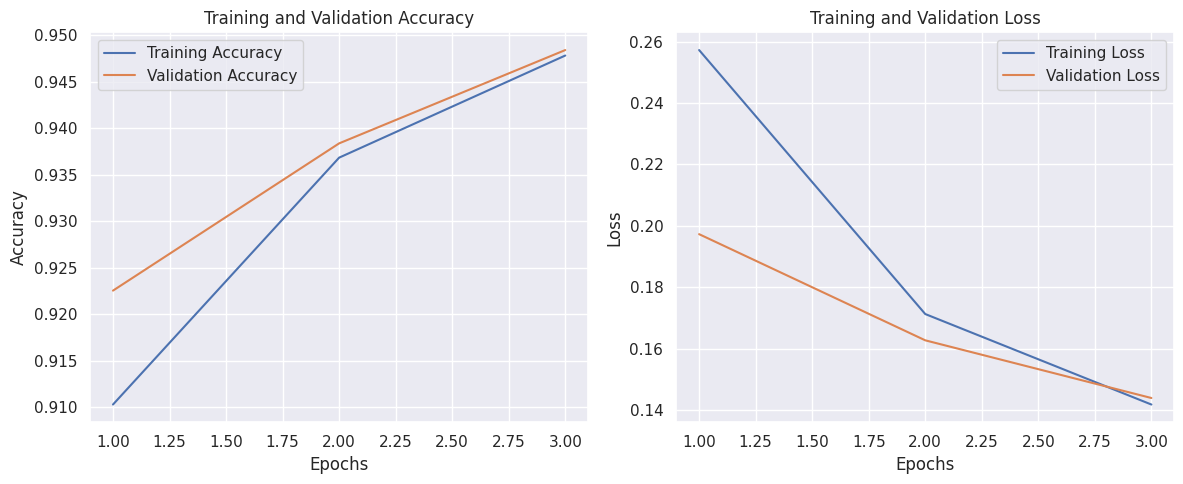

In [ ]:
# model to predict if a comment is toxic or not
# Without downsampling
# Split the data into features and labels for each set
X_train_toxic_only = train_data['comment_text']
y_train_toxic_only = train_data['toxic']
X_val_toxic_only = val_data['comment_text']
y_val_toxic_only = val_data['toxic']
X_test_toxic_only = test_data['comment_text']
y_test_toxic_only = test_data['toxic']

# Define the parameters for vectorization and embedding
max_features = 10000
max_len = 500
embedding_dim = 50

# Initialize and adapt the TextVectorization layer to the training data
vectorize_layer_2 = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len
)
vectorize_layer_2.adapt(X_train_toxic_only)

# Build the model
toxic_model = Sequential([
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer_2,
    Embedding(input_dim=max_features+1, output_dim=embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
toxic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = toxic_model.fit(X_train_toxic_only, y_train_toxic_only, epochs=3, validation_data=(X_val_toxic_only, y_val_toxic_only), batch_size=32)
plot_training_history(history)


### Model 4: Model to predict if a comment is obscene

Epoch 1/3
4192/4192 [==============================] - 107s 25ms/step - loss: 0.1828 - accuracy: 0.9470 - val_loss: 0.1396 - val_accuracy: 0.9520
Epoch 2/3
4192/4192 [==============================] - 40s 10ms/step - loss: 0.1125 - accuracy: 0.9611 - val_loss: 0.1074 - val_accuracy: 0.9642
Epoch 3/3
4192/4192 [==============================] - 40s 9ms/step - loss: 0.0845 - accuracy: 0.9709 - val_loss: 0.0954 - val_accuracy: 0.9711


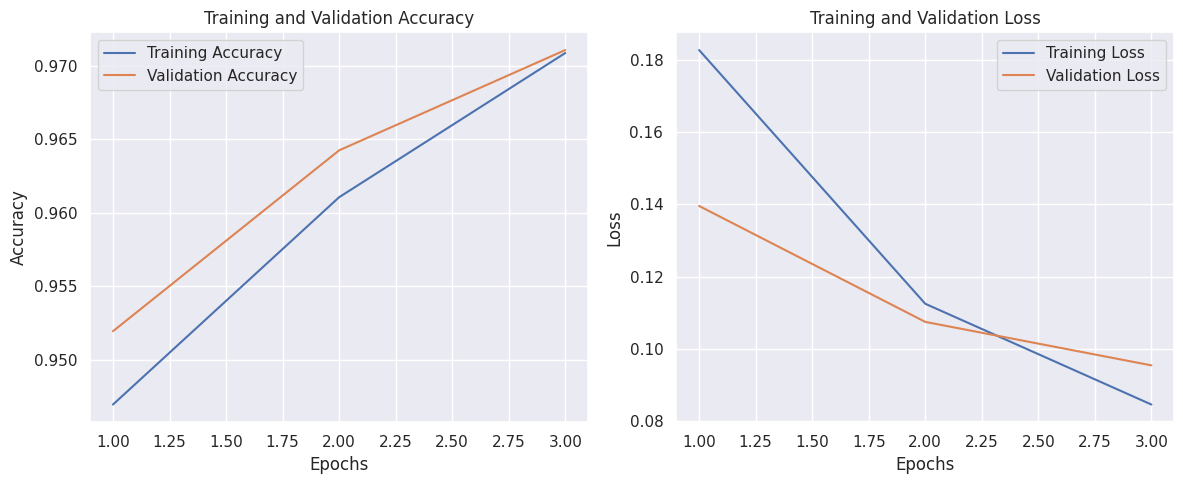

In [ ]:
# model to predict if a comment is obscene or not
# Without downsampling
# Split the data into features and labels for each set
X_train_obscene_only = train_data['comment_text']
y_train_obscene_only = train_data['obscene']
X_val_obscene_only = val_data['comment_text']
y_val_obscene_only = val_data['obscene']
X_test_obscene_only = test_data['comment_text']
y_test_obscene_only = test_data['obscene']

# Define the parameters for vectorization and embedding
max_features = 10000
max_len = 500
embedding_dim = 50

# Initialize and adapt the TextVectorization layer to the training data
vectorize_layer_2 = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len
)
vectorize_layer_2.adapt(X_train_obscene_only)

# Build the model
obscene_model = Sequential([
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer_2,
    Embedding(input_dim=max_features+1, output_dim=embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
obscene_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = obscene_model.fit(X_train_obscene_only, y_train_obscene_only, epochs=3, validation_data=(X_val_obscene_only, y_val_obscene_only), batch_size=32)

plot_training_history(history)

### Model 5: Model to predict if a comment is a threat

Epoch 1/3
4192/4192 [==============================] - 103s 24ms/step - loss: 0.0347 - accuracy: 0.9958 - val_loss: 0.0188 - val_accuracy: 0.9971
Epoch 2/3
4192/4192 [==============================] - 51s 12ms/step - loss: 0.0197 - accuracy: 0.9968 - val_loss: 0.0180 - val_accuracy: 0.9970
Epoch 3/3
4192/4192 [==============================] - 37s 9ms/step - loss: 0.0177 - accuracy: 0.9967 - val_loss: 0.0159 - val_accuracy: 0.9971


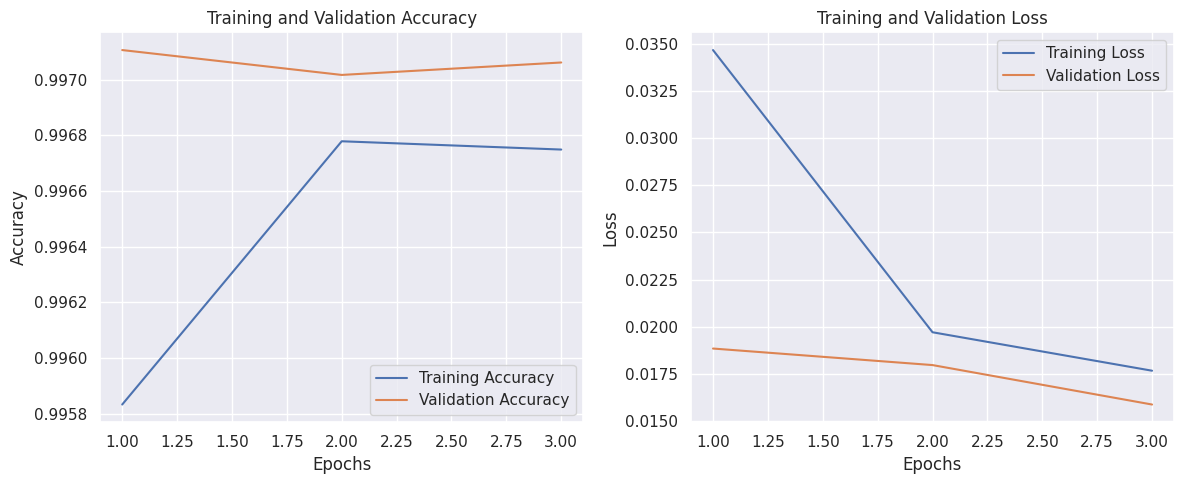

In [ ]:
# model to predict if a comment is threat or not
# Without downsampling
# Split the data into features and labels for each set
X_train_threat_only = train_data['comment_text']
y_train_threat_only = train_data['threat']
X_val_threat_only = val_data['comment_text']
y_val_threat_only = val_data['threat']
X_test_threat_only = test_data['comment_text']
y_test_threat_only = test_data['threat']

# Define the parameters for vectorization and embedding
max_features = 10000
max_len = 500
embedding_dim = 50

# Initialize and adapt the TextVectorization layer to the training data
vectorize_layer_2 = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=max_len
)
vectorize_layer_2.adapt(X_train_threat_only)

# Build the model
threat_model = Sequential([
    Input(shape=(1,), dtype=tf.string),
    vectorize_layer_2,
    Embedding(input_dim=max_features+1, output_dim=embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
threat_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = threat_model.fit(X_train_threat_only, y_train_threat_only, epochs=3, validation_data=(X_val_threat_only, y_val_threat_only), batch_size=32)
plot_training_history(history)


#Testing the Models

In [ ]:
#Testing Model 1
test_loss, test_acc = model_1.evaluate(X_test, y_test)
# Print the results
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

699/699 [==============================] - 3s 5ms/step - loss: 0.4226 - accuracy: 0.7979
Test Loss:  0.42256495356559753
Test Accuracy:  0.7979422807693481


In [ ]:
#Testing Model 2
test_loss, test_acc = model_2.evaluate(X_test, y_test)
# Print the results
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

699/699 [==============================] - 3s 4ms/step - loss: 0.1482 - accuracy: 0.9481
Test Loss:  0.14824602007865906
Test Accuracy:  0.948110044002533


In [ ]:
#Testing Model 3
test_loss, test_acc = toxic_model.evaluate(X_test, y_test)
# Print the results
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

699/699 [==============================] - 3s 4ms/step - loss: 0.1531 - accuracy: 0.9447
Test Loss:  0.1531444787979126
Test Accuracy:  0.9446656107902527


In [ ]:
#Testing Model 4
test_loss, test_acc = obscene_model.evaluate(X_test, y_test)
# Print the results
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

699/699 [==============================] - 3s 4ms/step - loss: 0.1937 - accuracy: 0.9364
Test Loss:  0.1936693638563156
Test Accuracy:  0.9363900423049927


In [ ]:
#Testing Model 5
test_loss, test_acc = threat_model.evaluate(X_test, y_test)
# Print the results
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

699/699 [==============================] - 3s 4ms/step - loss: 0.5839 - accuracy: 0.9008
Test Loss:  0.5838528275489807
Test Accuracy:  0.9008275270462036


# Error Inspection

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = (model.predict(X_test) > 0.75).astype("int32")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report
    cr = classification_report(y_test, y_pred, target_names=['non-toxic', 'toxic'])

    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", cr)

    return cm, cr

#  Error inspection for model 2
cm_model_2, cr_model_2 = evaluate_model(model_2, X_test, y_test) #Evaluating Model 2 (without downsampling)

699/699 [==============================] - 2s 3ms/step
Confusion Matrix:
 [[20019   114]
 [ 1165  1057]]

Classification Report:
               precision    recall  f1-score   support

   non-toxic       0.95      0.99      0.97     20133
       toxic       0.90      0.48      0.62      2222

    accuracy                           0.94     22355
   macro avg       0.92      0.74      0.80     22355
weighted avg       0.94      0.94      0.93     22355



Overall model performance for model 1 (which identifies toxic commments from non-toxic comments):
- The high precision and recall for the non-toxic reflect the model's robustness in identifying non-toxic content which is understandable because mojority of the comments were non-toxic.
- The model may still struggle with identifying all form of toxicity. This could be due inherent comlexity of understanding context in the language.

Ways that could improve the model:
- More complex neural network architeture like LSTM might capture sequential dependencies in the text better.
- Experiment with different optimizer and learning rates could yeild better results.

In [ ]:
# Error inspection for model 3
cm_toxic_model, cr_toxic_model = evaluate_model(toxic_model, X_test_toxic_only, y_test_toxic_only)

699/699 [==============================] - 2s 3ms/step
Confusion Matrix:
 [[20165    80]
 [ 1259   851]]

Classification Report:
               precision    recall  f1-score   support

   non-toxic       0.94      1.00      0.97     20245
       toxic       0.91      0.40      0.56      2110

    accuracy                           0.94     22355
   macro avg       0.93      0.70      0.76     22355
weighted avg       0.94      0.94      0.93     22355



#### Interpreting Recall and Precision Trade-off for this model
The model exhibits a significant trade-off between precision and recall for the toxic class. While it has high precision, its recall is quite low, which means it's conservative about labeling comments as toxic — preferring to miss some toxic comments rather than mislabel non-toxic comments as toxic.

The model is very effective at identifying non-toxic comments (high TN).
However, it struggles somewhat with toxic comments, misclassifying 1259 actual toxic comments as non-toxic (high FN).

The amount of data it is trained on is less. Since, dataset has many more non-toxic comments than toxic comments, we could reconsider oversampling the toxic class or undersampling the non-toxic class.

# Final  Results

**Comparison between model 1 and 2:** They perform the same task of identifying if a comment is negative in any way. However, model one works with a smaller data sample while model 2 works with the full dataset. Model 2 performs better in the training which introduces a trend that is supported by the other three models.

This trend is that in a given data sample, the smaller the desired data set is compared to the rest of the data, the better the performance of the model during the training. However, as we will see, this does not always generalise well to new data that the model has not seen before.

In the case of model 1 and model 2, model 1 had about 22,000 negative comments against 30,000 unclassified comments. Model 2 on the other hand had about 22,000 negative comments against
all 200,000 of the unclassified comments. Comparing their validation accuracies, model 2 with a validation accuracy of 0.9483 does better than model 1  with a validation accuracy of 0.8203. However it is of note that model 1 had a higher jump in values between epochs than model 2 for the same number of epochs.

**Comparison between models 3, 4 and 5:** These models classify comments based on different specific categories. Model 3 classifies a comment as specifically toxic or not, model 4 classifies them as specifically obscene or not and model 5 classifies if they are threats. We chose these different categories based on the number of comments we have in each category.

There are 20,000 toxic comments against the 200,000 comments in total and model 3 had a validation accuracy of 0.9522. In comparison model 5 had a validation accuracy of 0.9971 for 689 threat comments against 200,000 comments in total. This supports the trend we addressed earlier about size of the desired data set.

**Test evaluation:** Testing out the models with the test data revealed more information about the importance of the data size. The test data revealed that while a smaller desired data set against the entire data set is better, there is a threshold for how small the desired data set can be.

Between model 1 and 2, model 2 still performed better on the test data which is consitent with what was expected. However, with models 3, 4 and 5, the test accuracy dropped with each model. The test accuracy of model 5 was the lowest, with model 4 being higher and model 3 being the highest amongst those three. This is a complete switch up from the validation accuracy gotten while training the models.

This suggests that the model didn't have enough data in its training to generalise well with new data which leads to overfitting. That is, the model isn't able to do as well on new data as it did on the training data.

**Conclusion:** Model 2 is the best model we have. It is better than model 1 because it is more accurate while performing the same task. We also chose it over models 3, 4 and 5 because those ones perform sub tasks under model 2. Model 2 is able to generalise and tell us if a comment is negative in any way even if it cant categorize the type of negativity. Models 3, 4 and 5 on the other hand are only able to handle one specific sub category of negativity each.
